<a href="https://colab.research.google.com/github/mbhuiyan1/Advanced-Machine-Learning/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
#Reading Input Data
df = pd.read_csv('/content/drive/MyDrive/DS-Projects-practices-22/Clustering/protein.csv')

In [77]:
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [78]:
# Choose Redmeat and white meat 
df1 = df.iloc[:, [1, 2]]
df1.head()

,RedMeat,WhiteMeat
0,10.1,1.4
1,8.9,14.0
2,13.5,9.3
3,7.8,6.0
4,9.7,11.4


Text(0.5, 1.0, 'Protien Consumtion Data in Europe')

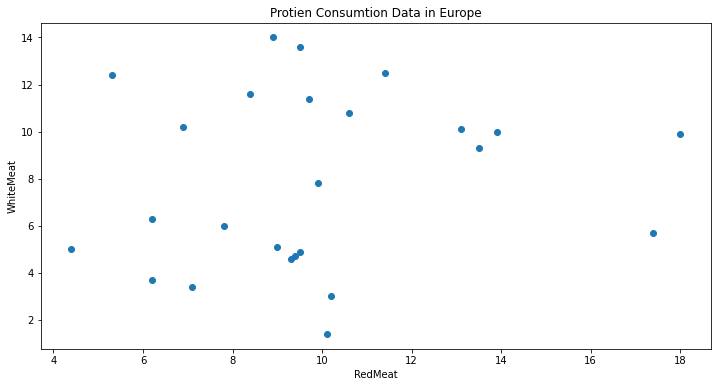

In [79]:
#Plot data points
plt.figure(figsize=(12,6))
plt.scatter(df[' RedMeat'],df[' WhiteMeat'] )
plt.xlabel('RedMeat')
plt.ylabel('WhiteMeat')
plt.title('Protien Consumtion Data in Europe')

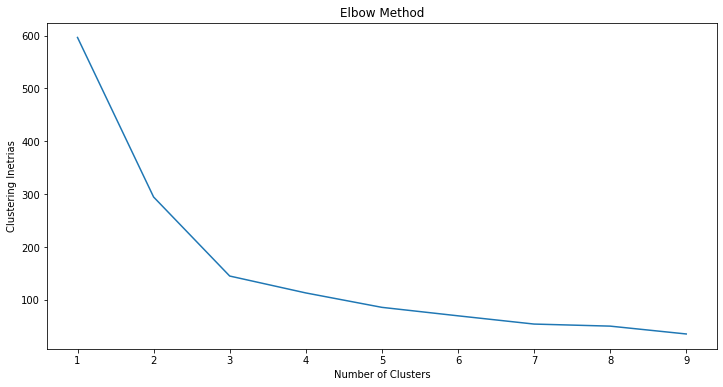

In [80]:
individual_clustering_inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(df1)
    individual_clustering_inertia.append(kmeans.inertia_) 

plt.figure(figsize=(12,6))
plt.plot(range(1, 10), individual_clustering_inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Inetrias')
plt.show()

In [81]:
# Print the inertias
individual_clustering_inertia

[596.38,
 294.50662337662334,
 144.98383333333334,
 113.01978571428569,
 85.73461904761903,
 69.71333333333332,
 54.10333333333333,
 50.195833333333326,
 35.35166666666667]

In [82]:
#We fit the model with 4 clusters and predict
kmeans= KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(df1)

pred = kmeans.predict(df1)
pred

array([3, 2, 0, 1, 2, 2, 2, 3, 0, 3, 2, 0, 3, 2, 3, 2, 1, 1, 1, 3, 0, 0,
       3, 2, 1], dtype=int32)

In [83]:
df1['Cluster'] = pd.DataFrame(pred, columns=['cluster'] ) #Adding cluster columns to data df1
df1.head(n=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RedMeat,WhiteMeat,Cluster
0,10.1,1.4,3
1,8.9,14.0,2
2,13.5,9.3,0
3,7.8,6.0,1
4,9.7,11.4,2
5,10.6,10.8,2
6,8.4,11.6,2
7,9.5,4.9,3
8,18.0,9.9,0
9,10.2,3.0,3


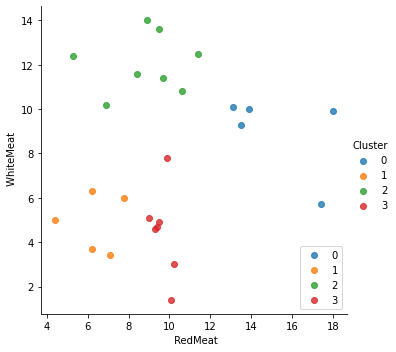

In [84]:
import seaborn as sns
# 'hue' argument to provide a factor variable
sns.lmplot( x=" RedMeat", y=" WhiteMeat", data=df1, fit_reg=False, hue='Cluster', legend=True)
plt.legend(loc='lower right')
plt.show()

In [85]:
# Here we see the centroids
kmeans.cluster_centers_

array([[15.18      ,  9.        ],
       [ 6.34      ,  4.88      ],
       [ 8.8375    , 12.0625    ],
       [ 9.62857143,  4.5       ]])

##Kemans++
Now we want to inintialize the centroid randomly in such a way that the convergence might be faster. In this case, two centroids are initialized far away from each other. 

In [86]:
#define the datasets again (for simplicity)
df2 = df.iloc[:, [1, 2]]
df2.head()

,RedMeat,WhiteMeat
0,10.1,1.4
1,8.9,14.0
2,13.5,9.3
3,7.8,6.0
4,9.7,11.4


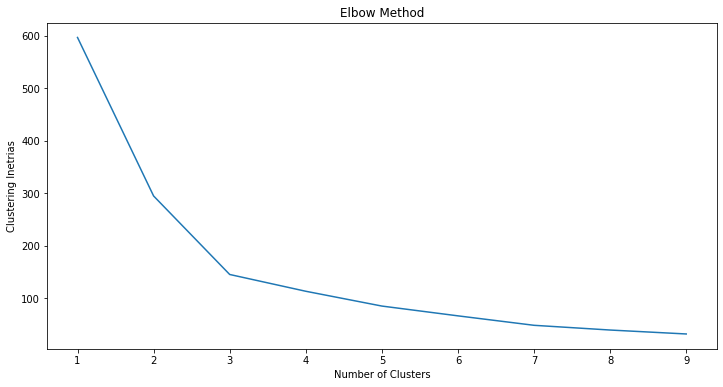

In [87]:
individual_clustering_inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df2)
    individual_clustering_inertia.append(kmeans.inertia_) 
    

plt.figure(figsize=(12,6))
plt.plot(range(1, 10), individual_clustering_inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Inetrias')
plt.show()

In [88]:
kmeans1= KMeans(n_clusters = 4, random_state = 42)
kmeans1.fit(df2)

pred = kmeans1.predict(df2)
pred

array([3, 2, 0, 1, 2, 2, 2, 3, 0, 3, 2, 0, 3, 2, 3, 2, 1, 1, 1, 3, 0, 0,
       3, 2, 1], dtype=int32)

In [89]:
df2['Cluster'] = pd.DataFrame(pred, columns=['cluster'] ) #Adding cluster columns to data df1
df2.head(n=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RedMeat,WhiteMeat,Cluster
0,10.1,1.4,3
1,8.9,14.0,2
2,13.5,9.3,0
3,7.8,6.0,1
4,9.7,11.4,2
5,10.6,10.8,2
6,8.4,11.6,2
7,9.5,4.9,3
8,18.0,9.9,0
9,10.2,3.0,3


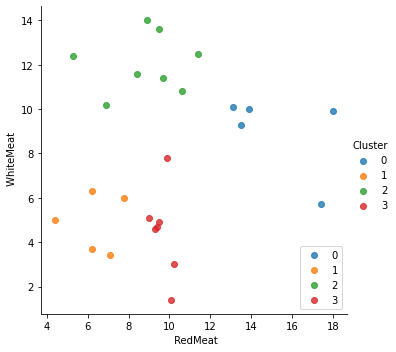

In [90]:
import seaborn as sns
# 'hue' argument to provide a factor variable
sns.lmplot( x=" RedMeat", y=" WhiteMeat", data=df2, fit_reg=False, hue='Cluster', legend=True)
plt.legend(loc='lower right')
plt.show()

In [91]:
# Here we see the centroids
kmeans1.cluster_centers_

array([[15.18      ,  9.        ],
       [ 6.34      ,  4.88      ],
       [ 8.8375    , 12.0625    ],
       [ 9.62857143,  4.5       ]])

In the above code, we just pick only two features for data visualization. We can also choose all the features and apply the Pricipal component analysis, and do the clustering and visualization. 
To be continued....